# Importing data

## Loading the relevant packages

In [1]:
from plots import *
from predictors import *
import pickle

In [2]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Downloading and loading the data

All the data used in this project has been provided but can also be found from this Dropbox link [here](https://www.dropbox.com/sh/g83l36oxtwper4v/AABSUPY18SJjwCEZ4sNOh7lda?dl=0). If this seizes to exist then please email me at Ryan.Menzies.2018@live.rhul.ac.uk. Please extract both the *datasets.zip* and *pickle files.zip* into the parent folder.

### USPS

In [3]:
X_data_usps = np.genfromtxt("datasets/X_data_usps.data", delimiter=',')
X_train_usps = np.genfromtxt("datasets/X_train_usps.data", delimiter=',')
X_valid_usps = np.genfromtxt("datasets/X_valid_usps.data", delimiter=',')
X_test_usps =  np.genfromtxt("datasets/X_test_usps.data" , delimiter=',')
y_data_usps = np.genfromtxt("datasets/y_data_usps.data", delimiter=',')
y_train_usps = np.genfromtxt("datasets/y_train_usps.data", delimiter=',')
y_train_usps = np.int_(y_train_usps)
y_valid_usps = np.genfromtxt("datasets/y_valid_usps.data", delimiter=',')
y_valid_usps = np.int_(y_valid_usps)
y_test_usps =  np.genfromtxt("datasets/y_test_usps.data" , delimiter=',')
y_test_usps = np.int_(y_test_usps)

### MNIST

In [4]:
X_train_mnist = np.genfromtxt("datasets/X_train_mnist.data", delimiter=',')
X_valid_mnist = np.genfromtxt("datasets/X_valid_mnist.data", delimiter=',')
X_test_mnist =  np.genfromtxt("datasets/X_test_mnist.data" , delimiter=',')
y_train_mnist = np.genfromtxt("datasets/y_train_mnist.data", delimiter=',')
y_valid_mnist = np.genfromtxt("datasets/y_valid_mnist.data", delimiter=',')
y_test_mnist =  np.genfromtxt("datasets/y_test_mnist.data" , delimiter=',')
y_train_mnist = np.int_(y_train_mnist)
y_valid_mnist = np.int_(y_valid_mnist)
y_test_mnist = np.int_(y_test_mnist)

### EMNIST letters

In [5]:
X_test_letters_exp =  np.genfromtxt("datasets/X_test_letters_exp.data" , delimiter=',')
y_test_letters_exp =  np.genfromtxt("datasets/y_test_letters_exp.data" , delimiter=',')
y_test_letters_exp = np.int_(y_test_letters_exp)

### Pickle files

In [6]:
with open('pickle files/p_values.data','rb') as ff:
    pickle_pvalues = pickle.load(ff)

with open('pickle files/models.data','rb') as ff:
    models = pickle.load(ff)

# Conformal Predictors

### USPS

#### Transductive conformal predictor

In [7]:
NN_pvalues_full = NNpvalues_full(X_train_usps, y_train_usps, X_test_usps, y_test_usps)

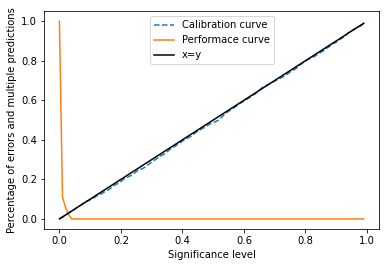

In [8]:
cal_nn_full = calibration_curve(y_test_usps, NN_pvalues_full, np.arange(0,1,0.01))

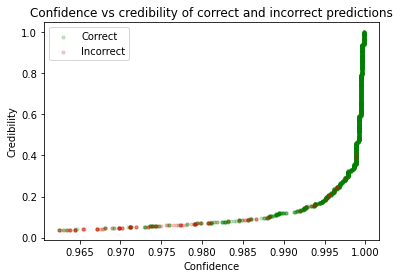

In [9]:
corr_incorr_nn_full = corr_incorr_plot(NN_pvalues_full, y_test_usps)

#### On-line conformal predictor

The on-line CP was very inefficient. To be run from scratch you can change the cell type below from markdown to code and run. Otherwise it can be loading by using a pickle file.

NN_pvalues_online = NNpvalues_online(X_data_usps, y_data_usps, np.arange(10))

In [10]:
NN_pvalues_online = pickle_pvalues['USPS']['NN']['online']

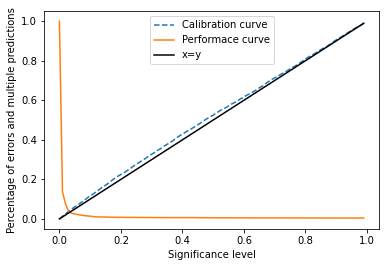

In [11]:
cal_nn_online = calibration_curve(y_data_usps, NN_pvalues_online, np.arange(0,1,0.01))

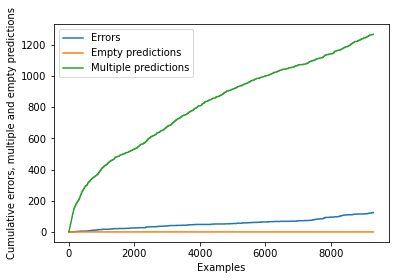

In [12]:
online_cumm_1 = cumm_plot(NN_pvalues_online,y_data_usps, 0.01)

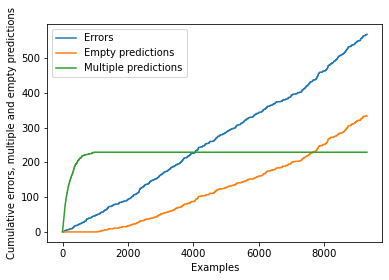

In [13]:
online_cumm_5 = cumm_plot(NN_pvalues_online,y_data_usps, 0.05)

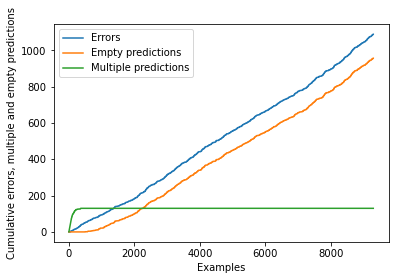

In [14]:
online_cumm_10 = cumm_plot(NN_pvalues_online,y_data_usps, 0.1)

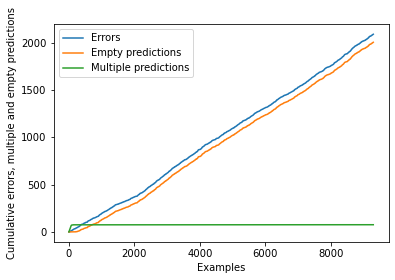

In [15]:
online_cumm_20 = cumm_plot(NN_pvalues_online,y_data_usps, 0.2)

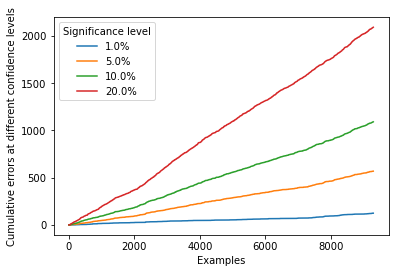

In [16]:
err_plot_nn_online = err_plot(NN_pvalues_online,y_data_usps)

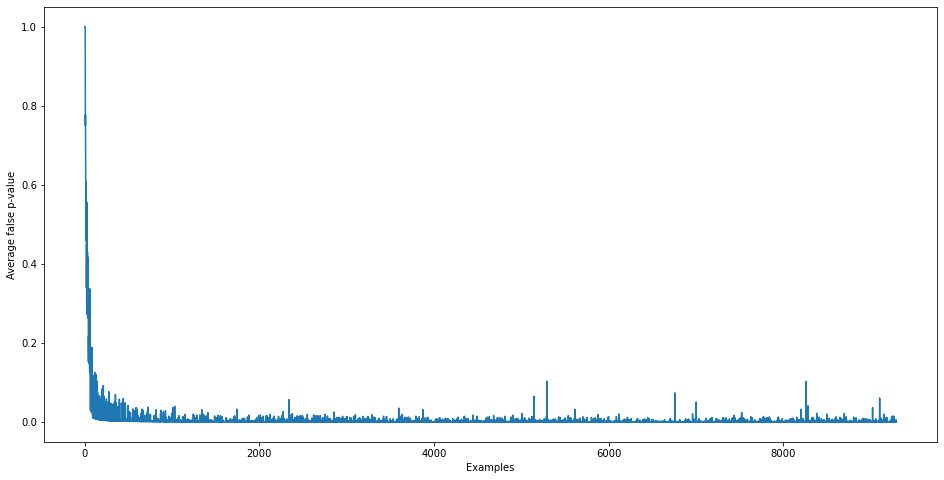

In [17]:
ave_false_nn_online = ave_false_p(NN_pvalues_online, y_data_usps)

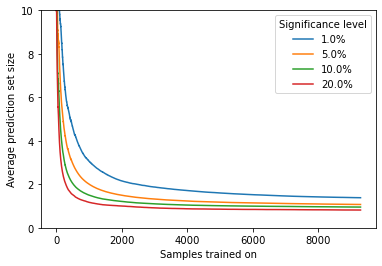

In [18]:
set_size_eps_nn_online = ave_set_plot(NN_pvalues_online, epsilons = np.array([0.01, 0.05, 0.1, 0.2]))

#### Inductive conformal predictors

##### Nearest neighbour

In [19]:
nn_pvalues_induct_usps = NNpvalues_induct(X_train_usps, y_train_usps, X_valid_usps, y_valid_usps, X_test_usps, y_test_usps)

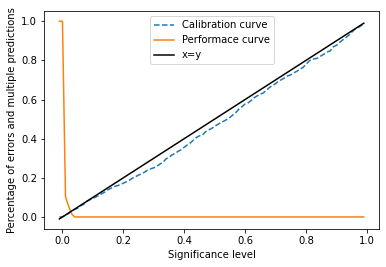

In [20]:
cal_nn_induct_usps = calibration_curve(y_test_usps, nn_pvalues_induct_usps, np.arange(-.01,1,0.01))

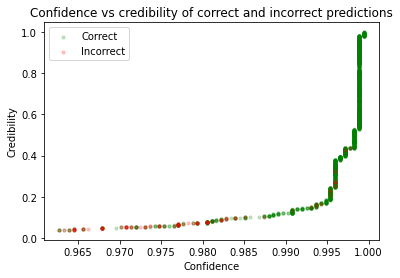

In [21]:
corr_incorr_nn_induct_usps = corr_incorr_plot(nn_pvalues_induct_usps, y_test_usps)

##### SVM

In [22]:
SVM_model_usps = SVC(probability=True)
SVM_pvalues_induct_usps = inductive_conform_predictor(X_train_usps, y_train_usps, X_valid_usps, y_valid_usps, X_test_usps, y_test_usps, SVM_model_usps)

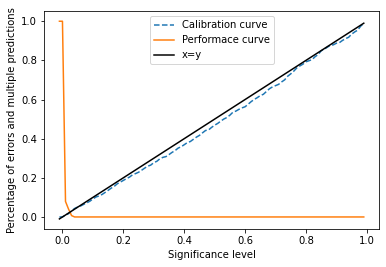

In [23]:
cal_SVM_induct_usps = calibration_curve(y_test_usps, SVM_pvalues_induct_usps, np.arange(-.01,1,0.01))

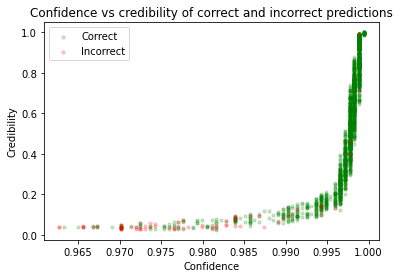

In [24]:
corr_incorr_SVM_induct_usps = corr_incorr_plot(SVM_pvalues_induct_usps, y_test_usps)

 ##### Decision tree

In [25]:
tree_model_usps = DecisionTreeClassifier(max_depth=20, max_leaf_nodes=100)
tree_pvalues_induct_usps = inductive_conform_predictor(X_train_usps, y_train_usps, X_valid_usps, y_valid_usps, X_test_usps, y_test_usps, tree_model_usps)

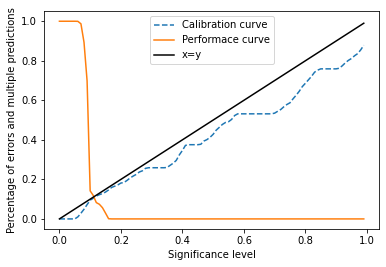

In [26]:
cal_tree_induct_usps = calibration_curve(y_test_usps, tree_pvalues_induct_usps, np.arange(0,1,0.01))

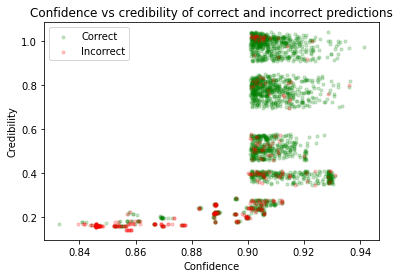

In [27]:
corr_incorr_tree_induct = corr_incorr_plot(tree_pvalues_induct_usps, y_test_usps)

##### Neural network

In [28]:
net_model_usps = MLPClassifier(solver='adam',
                          hidden_layer_sizes = (16*16,16*16,16*16,10),
                          max_iter=100,
                          activation = 'relu',
                          batch_size=32
                         )

In [29]:
net_pvalues_induct_usps = inductive_conform_predictor(X_train_usps, y_train_usps, X_valid_usps, y_valid_usps, X_test_usps, y_test_usps, net_model_usps)

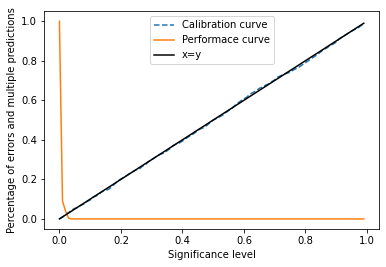

In [30]:
cal_net_induct_usps = calibration_curve(y_test_usps, net_pvalues_induct_usps, np.arange(0,1,0.01))

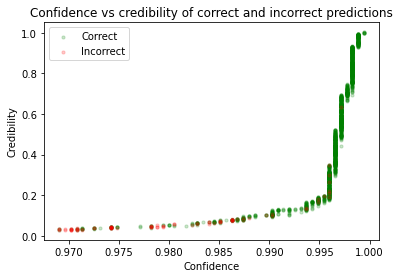

In [31]:
corr_incorr_net_induct = corr_incorr_plot(net_pvalues_induct_usps, y_test_usps)

##### Random forest

In [32]:
rf_model_usps = RandomForestClassifier(max_depth=10)
rf_pvalues_induct_usps = inductive_conform_predictor(X_train_usps, y_train_usps, X_valid_usps, y_valid_usps, X_test_usps, y_test_usps, rf_model_usps)

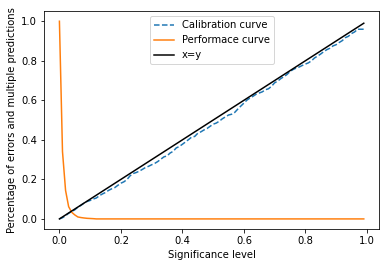

In [33]:
cal_rf_induct_usps = calibration_curve(y_test_usps, rf_pvalues_induct_usps, np.arange(0,1,0.01))

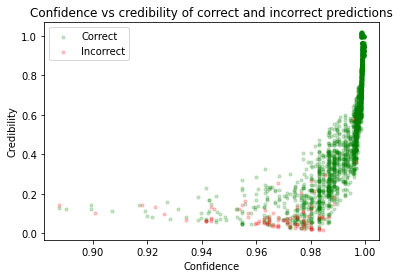

In [34]:
corr_incorr_rf_induct = corr_incorr_plot(rf_pvalues_induct_usps, y_test_usps)

#### Getting the point predictions with confidence and credibility

In [35]:
conf_table_nn_full_usps = conf_cred(NN_pvalues_full, y_test_usps)
conf_table_nn_online_usps = conf_cred(NN_pvalues_online, y_data_usps)
conf_table_nn_induct_usps = conf_cred(nn_pvalues_induct_usps, y_test_usps)
conf_table_SVM_induct_usps = conf_cred(SVM_pvalues_induct_usps, y_test_usps)
conf_table_net_induct_usps = conf_cred(net_pvalues_induct_usps, y_test_usps)
conf_table_tree_induct_usps = conf_cred(tree_pvalues_induct_usps, y_test_usps)
conf_table_rf_induct_usps = conf_cred(rf_pvalues_induct_usps, y_test_usps)

### MNIST

#### Nearest Neighbour

In [36]:
NN_pvalues_induct_mnist = NNpvalues_induct(X_train_mnist, y_train_mnist,
                                           X_valid_mnist, y_valid_mnist,
                                           X_test_mnist, y_test_mnist)

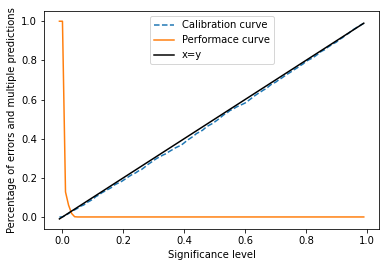

In [37]:
cal_nn_induct_mnist =calibration_curve(y_test_mnist, NN_pvalues_induct_mnist, np.arange(-.01,1,0.01))

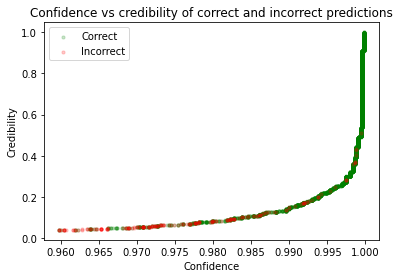

In [38]:
corr_incorr_nn_induct_mnist = corr_incorr_plot(NN_pvalues_induct_mnist, y_test_mnist)

#### SVM

In [39]:
SVM_model_mnist = SVC(probability=True)
SVM_pvalues_induct_mnist = inductive_conform_predictor(X_train_mnist, y_train_mnist,
                                           X_valid_mnist, y_valid_mnist,
                                           X_test_mnist, y_test_mnist,
                                            SVM_model_mnist)

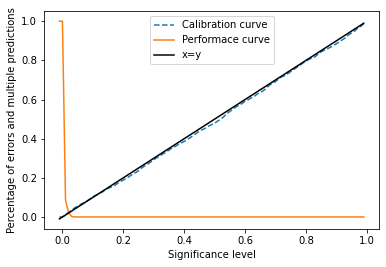

In [40]:
cal_SVM_induct_mnist = calibration_curve(y_test_mnist, SVM_pvalues_induct_mnist, np.arange(-.01,1,0.01))

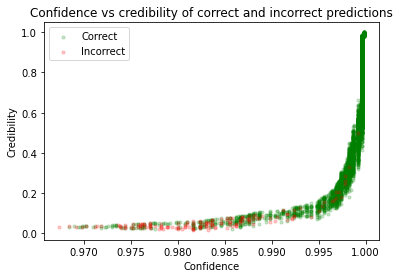

In [41]:
corr_incorr_SVM_induct_mnist = corr_incorr_plot(SVM_pvalues_induct_mnist, y_test_mnist)

#### Decision tree

In [42]:
tree_model_mnist = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100)
tree_pvalues_induct_mnist = inductive_conform_predictor(X_train_mnist, y_train_mnist,
                                                      X_valid_mnist, y_valid_mnist,
                                                      X_test_mnist, y_test_mnist, tree_model_mnist)

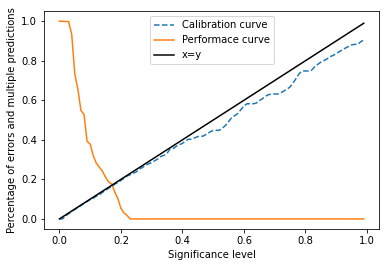

In [43]:
cal_tree_induct_mnist = calibration_curve(y_test_mnist, tree_pvalues_induct_mnist, np.arange(0,1,0.01))

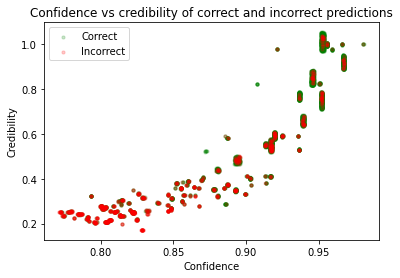

In [44]:
corr_incorr_tree_induct_mnist = corr_incorr_plot(tree_pvalues_induct_mnist, y_test_mnist)

#### Random forest

In [45]:
rf_model_mnist = RandomForestClassifier(max_depth=10)
rf_pvalues_induct_mnist = inductive_conform_predictor(X_train_mnist, y_train_mnist, X_valid_mnist, y_valid_mnist, X_test_mnist, y_test_mnist, rf_model_mnist)

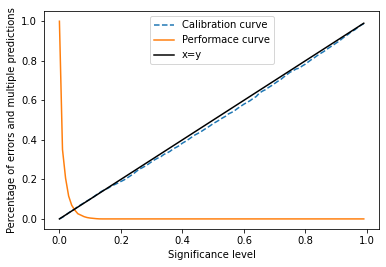

In [46]:
cal_rf_induct_mnist = calibration_curve(y_test_mnist, rf_pvalues_induct_mnist, np.arange(0,1,0.01))

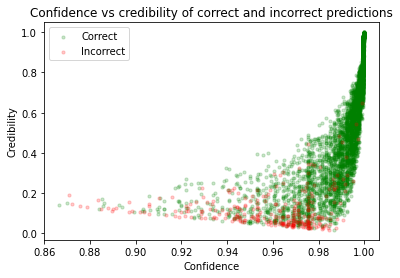

In [47]:
corr_incorr_rf_induct_mnist = corr_incorr_plot(rf_pvalues_induct_mnist, y_test_mnist)

#### Getting the point predictions with confidence and credibility

In [48]:
conf_table_nn_induct_mnist = conf_cred(NN_pvalues_induct_mnist, y_test_mnist)
conf_table_SVM_induct_mnist = conf_cred(SVM_pvalues_induct_mnist, y_test_mnist)
conf_table_tree_induct_mnist = conf_cred(tree_pvalues_induct_mnist, y_test_mnist)
conf_table_rf_induct_mnist = conf_cred(rf_pvalues_induct_mnist, y_test_mnist)

# Anomaly detection

## USPS

### Transductive conformal anomaly detector

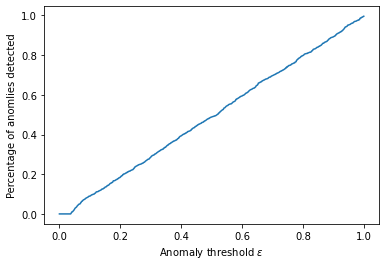

In [49]:
anom_nn_full_usps = anomaly_eps_errs(NN_pvalues_full)

### On-line conformal anomaly detector

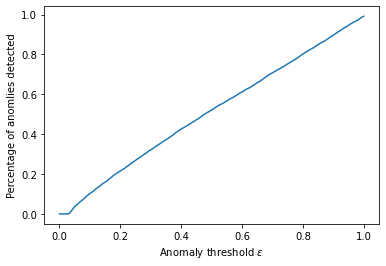

In [50]:
anom_nn_online_usps = anomaly_eps_errs(NN_pvalues_online)

### Inductive conformal anomaly detector

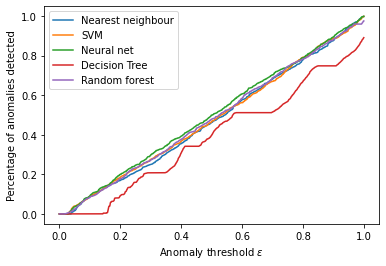

In [52]:
usps_anom_models = anomaly_eps_models([nn_pvalues_induct_usps, SVM_pvalues_induct_usps, net_pvalues_induct_usps, tree_pvalues_induct_usps, rf_pvalues_induct_usps],
                   ['Nearest neighbour','SVM', 'Neural net', 'Decision Tree', 'Random forest'])

#### Samples with low credibility

##### Nearest neighbour

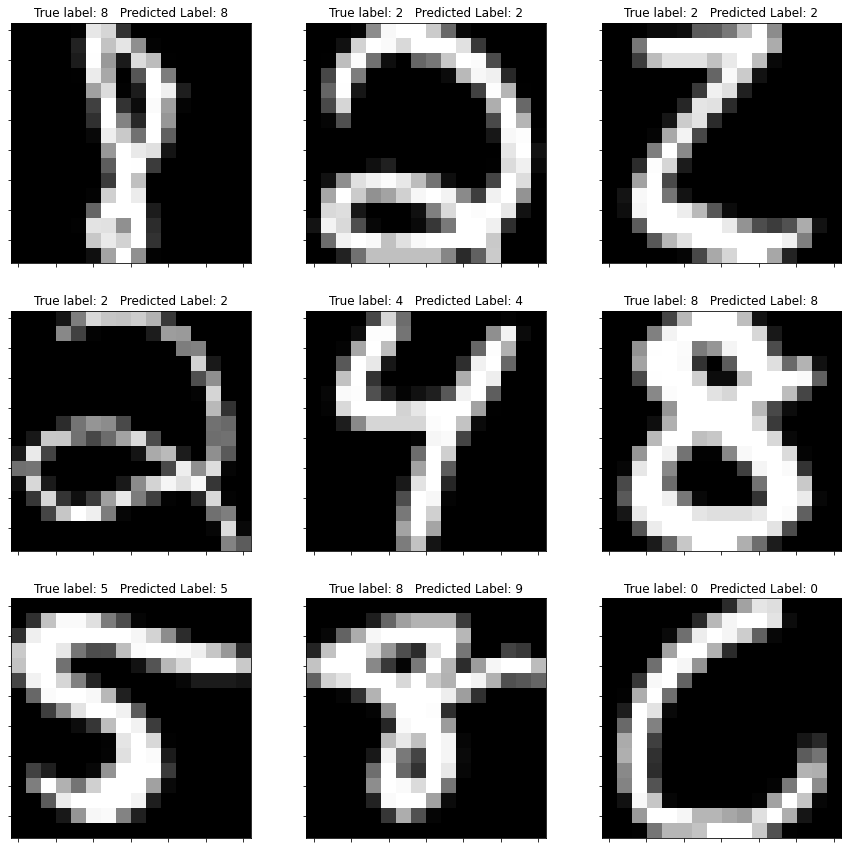

In [53]:
samples_nn_usps = cred_samples(conf_table_nn_induct_usps, X_test_usps, min_cred=0, max_cred=0.1, heading=False)

##### SVM

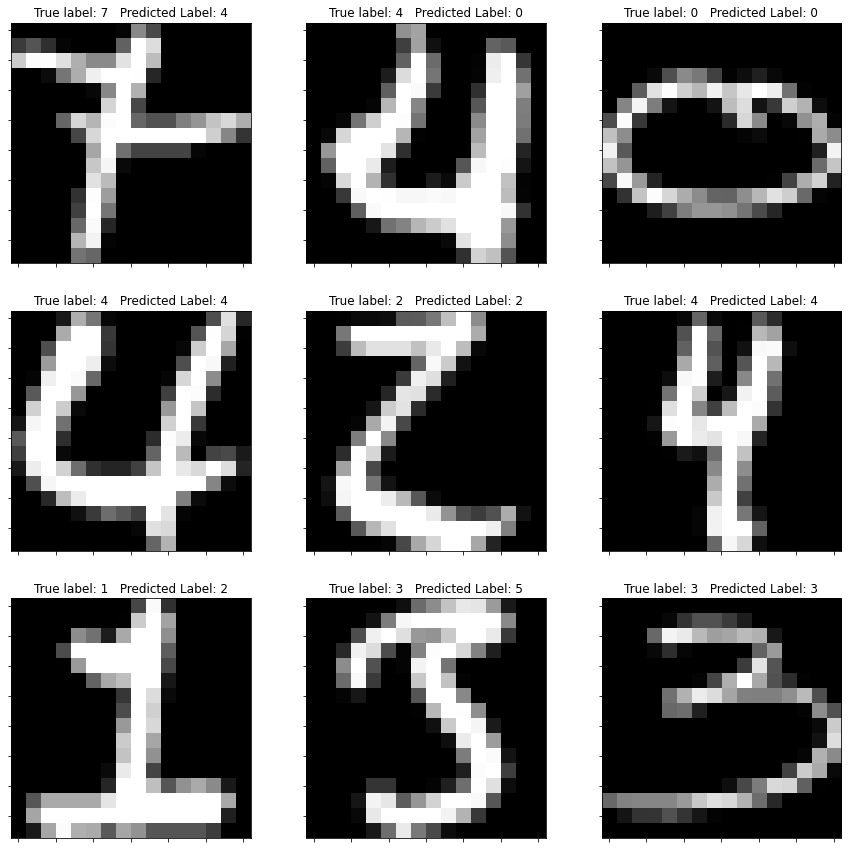

In [54]:
samples_SVM_usps = cred_samples(conf_table_SVM_induct_usps, X_test_usps, min_cred=0, max_cred=0.1, heading=False)

##### Neural network

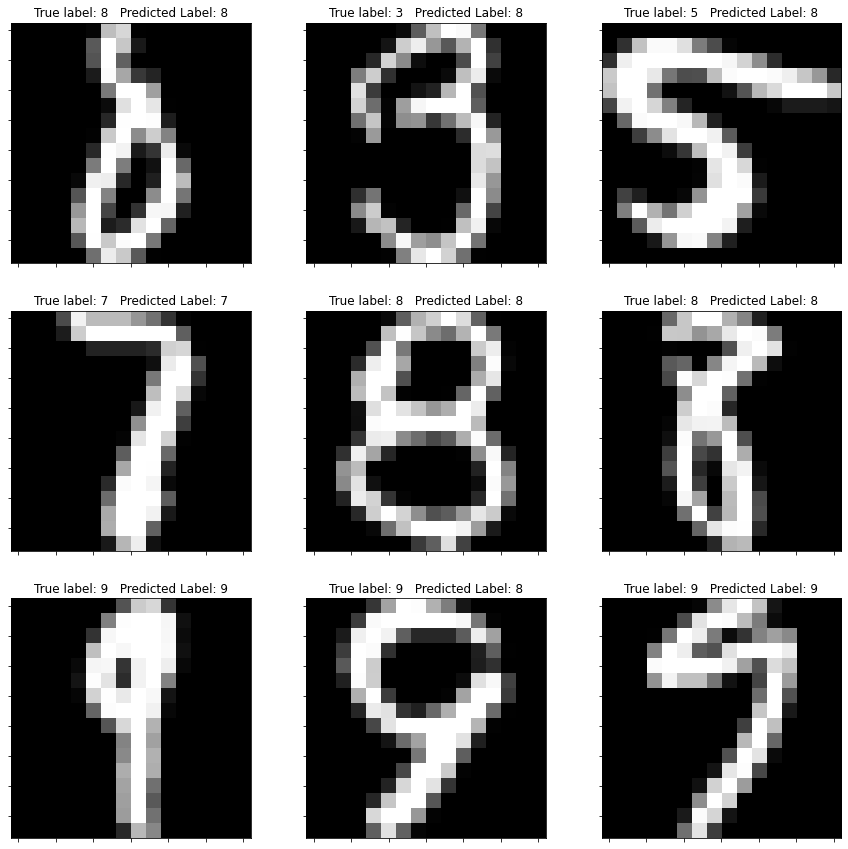

In [55]:
samples_net_usps = cred_samples(conf_table_net_induct_usps, X_test_usps, min_cred=0, max_cred=0.1, heading=False)

##### Decision tree

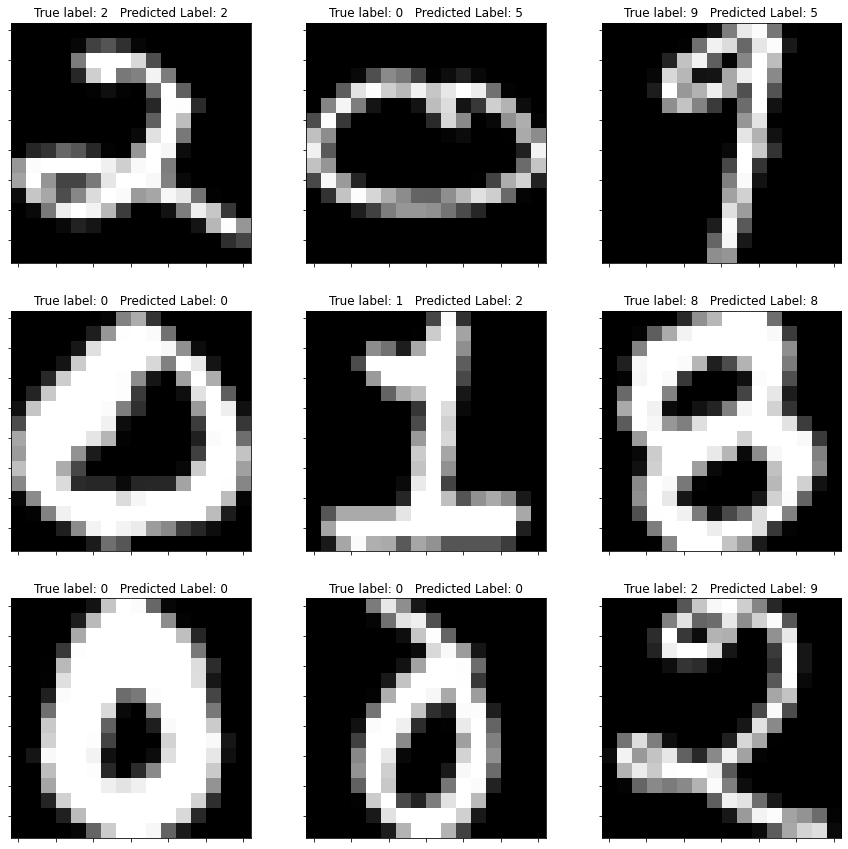

In [56]:
samples_tree_usps = cred_samples(conf_table_tree_induct_usps, X_test_usps, min_cred=0, max_cred=0.2, heading=False)

##### Random forest

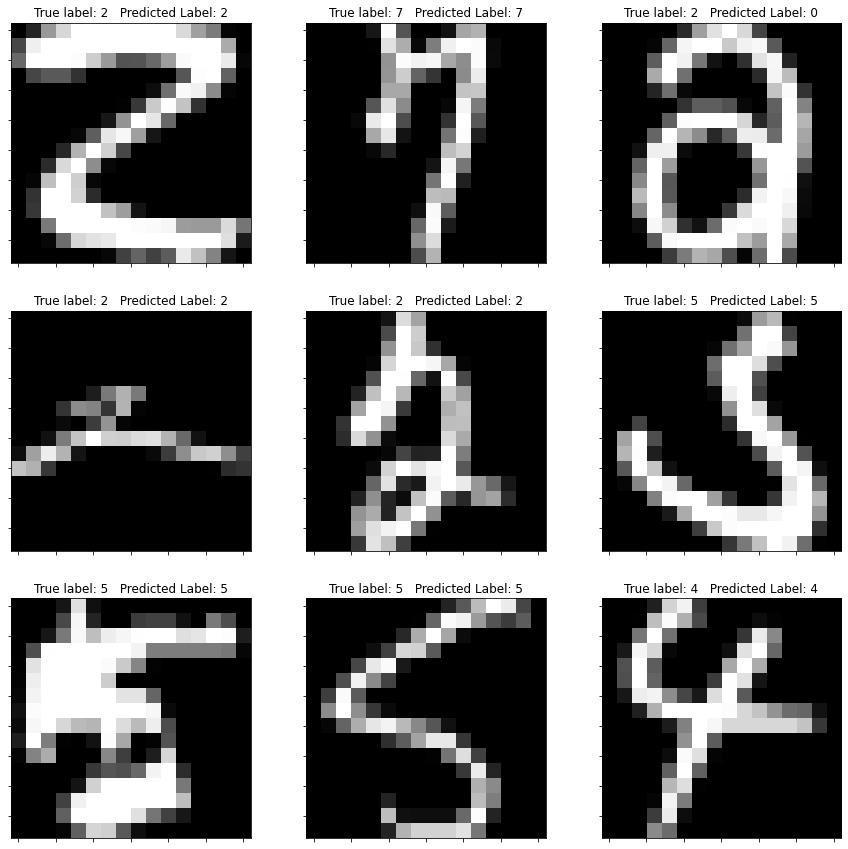

In [57]:
samples_rf_usps = cred_samples(conf_table_rf_induct_usps, X_test_usps, min_cred=0, max_cred=0.1, heading=False)

#### Anomaly detection performance

##### Creating the synthetic data

In [58]:
X_test_usps_anom = np.random.uniform(-1,1,(10000, 16*16))

##### Nearest neighbour

In [59]:
nn_pvalues_induct_usps_anom = NNpvalues_induct(X_train_usps, y_train_usps,
                                             X_valid_usps, y_valid_usps,
                                             X_test_usps_anom, y_test = [])

##### SVM

In [60]:
SVM_pvalues_induct_usps_anom = conform_predictor_model(X_valid_usps, y_valid_usps, X_test_usps_anom, SVM_model_usps)

##### Neural network

In [61]:
net_pvalues_induct_usps_anom = conform_predictor_model(X_valid_usps, y_valid_usps, X_test_usps_anom, net_model_usps)

##### Decision tree

In [62]:
tree_pvalues_induct_usps_anom = conform_predictor_model(X_valid_usps, y_valid_usps, X_test_usps_anom, tree_model_usps)

##### Random forest

In [63]:
rf_pvalues_induct_usps_anom = conform_predictor_model(X_valid_usps, y_valid_usps, X_test_usps_anom, rf_model_usps)

##### Comparing performances

In [64]:
model_pvalues_usps_anom = {'nn': nn_pvalues_induct_usps_anom,
                        'SVM': SVM_pvalues_induct_usps_anom,
                        'net': net_pvalues_induct_usps_anom,
                        'tree': tree_pvalues_induct_usps_anom,
                        'rf': rf_pvalues_induct_usps_anom}
model_names_usps = ['Nearest neighbour',
              'SVM',
               'Neural network',
              'Decision tree',
              'Random forest']

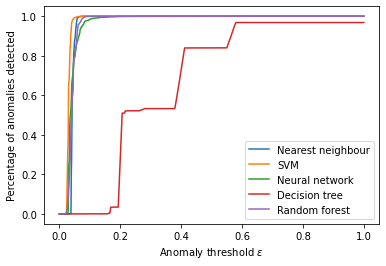

In [66]:
anom_detect_models_usps = anom_detect_curve(model_pvalues_usps_anom, model_names_usps)

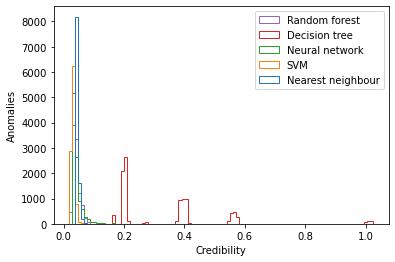

In [76]:
anom_hist_usps = anom_detect_hist(model_pvalues_usps_anom, model_names_usps, hist=100)

## MNIST

### Inductive conformal anomaly detectors

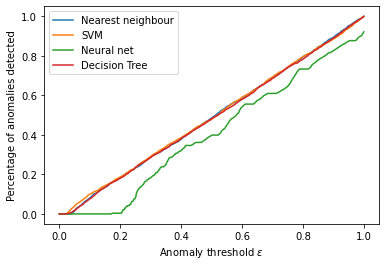

In [79]:
mnist_anom_models = anomaly_eps_models([NN_pvalues_induct_mnist, SVM_pvalues_induct_mnist, tree_pvalues_induct_mnist, rf_pvalues_induct_mnist],
                   ['Nearest neighbour','SVM', 'Neural net', 'Decision Tree', 'Random forest'])

#### Samples with low credibility

##### Nearest neighbour

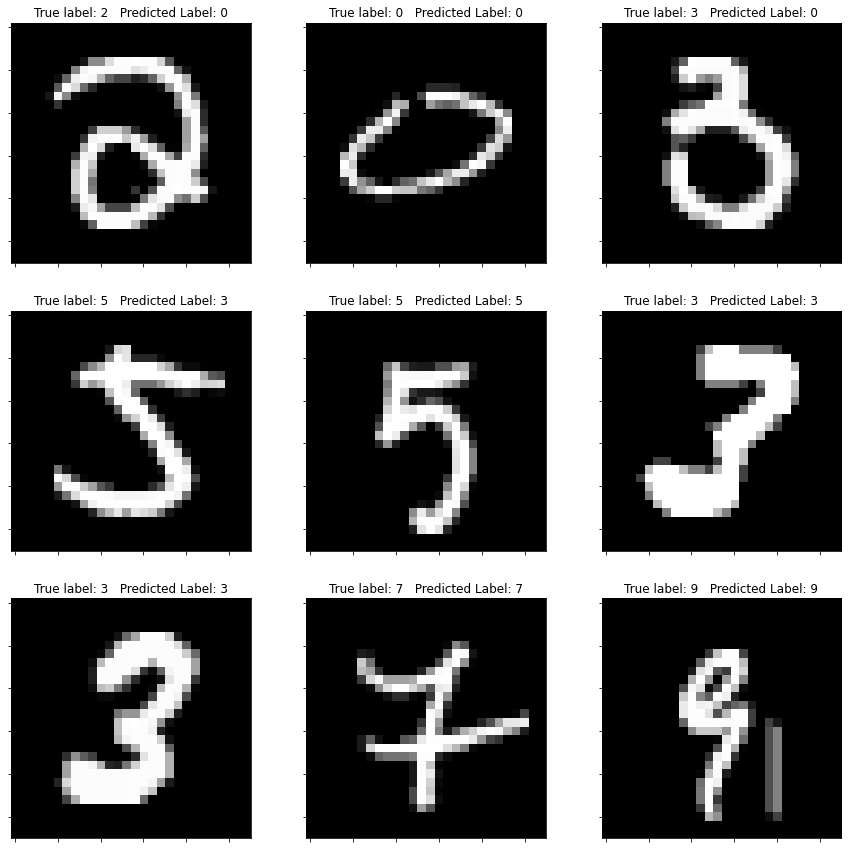

In [80]:
samples_nn_mnist = cred_samples(conf_table_nn_induct_mnist, X_test_mnist, min_cred=0, max_cred=0.1, heading=False)

##### SVM

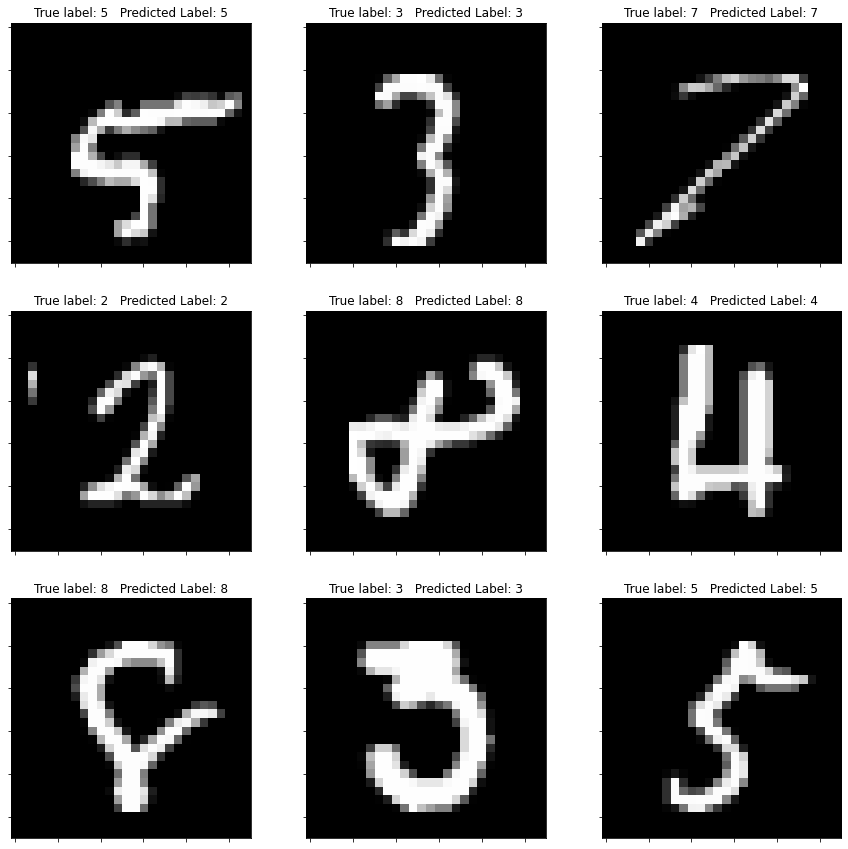

In [81]:
samples_SVM_mnist = cred_samples(conf_table_SVM_induct_mnist, X_test_mnist, min_cred=0, max_cred=0.1, heading=False)

##### Decision tree

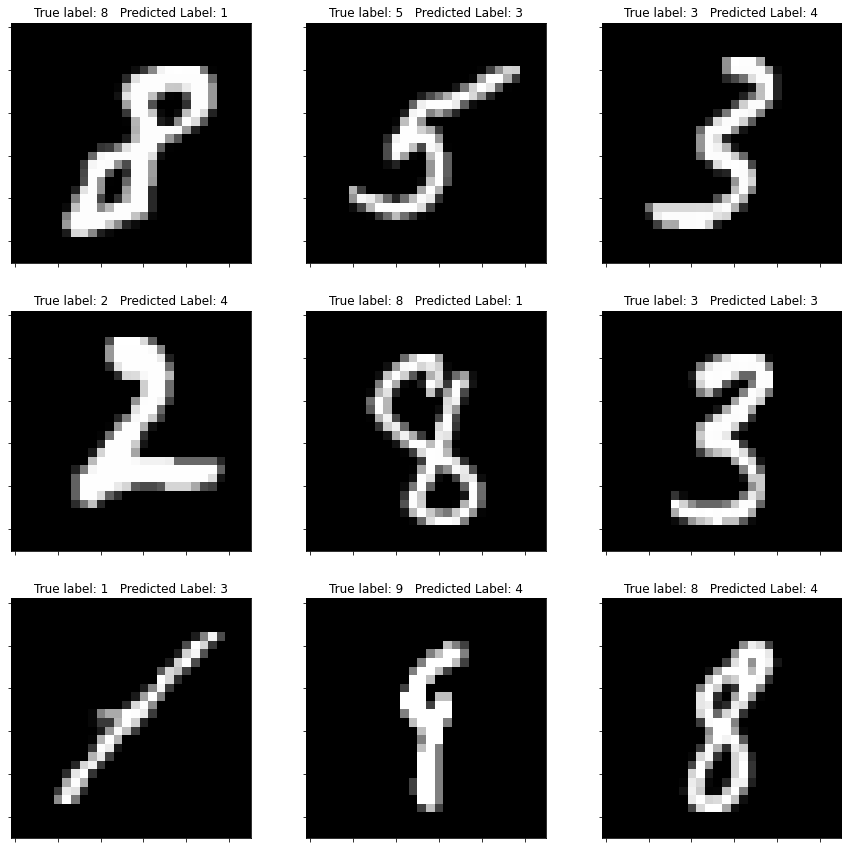

In [82]:
samples_tree_mnist = cred_samples(conf_table_tree_induct_mnist, X_test_mnist, min_cred=0, max_cred=0.2, heading=False)

##### Random forest

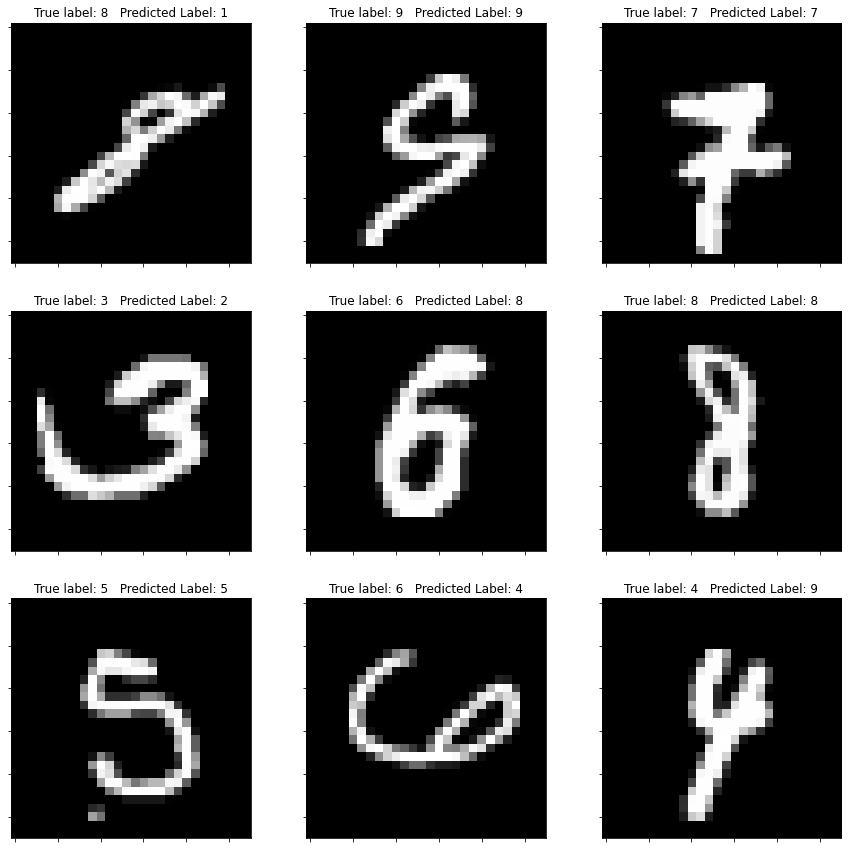

In [83]:
samples_rf_mnist = cred_samples(conf_table_rf_induct_mnist, X_test_mnist, min_cred=0, max_cred=0.1, heading=False)

#### Anomaly detection performance

##### Nearest neighbour

In [84]:
nn_pvalues_induct_mnist_anom = NNpvalues_induct(X_train_mnist, y_train_mnist,
                                             X_valid_mnist, y_valid_mnist,
                                             X_test_letters_exp, y_test = [])

##### SVM

In [85]:
SVM_pvalues_induct_mnist_anom = conform_predictor_model(X_valid_mnist, y_valid_mnist, X_test_letters_exp, SVM_model_mnist)

##### Decision tree

In [86]:
tree_pvalues_induct_mnist_anom = conform_predictor_model(X_valid_mnist, y_valid_mnist, X_test_letters_exp, tree_model_mnist)

##### Random forest

In [87]:
rf_pvalues_induct_mnist_anom = conform_predictor_model(X_valid_mnist, y_valid_mnist, X_test_letters_exp, rf_model_mnist)

##### Comparing performances

In [89]:
model_pvalues_mnist_anom = {'nn': nn_pvalues_induct_mnist_anom,
                        'SVM': SVM_pvalues_induct_mnist_anom,
                        'tree': tree_pvalues_induct_mnist_anom,
                        'rf': rf_pvalues_induct_mnist_anom}
model_names_mnist = ['Nearest neighbour',
              'SVM',
               'Neural network',
              'Decision tree',
              'Random forest']

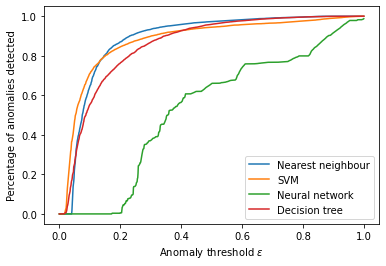

In [90]:
anom_detect_models_mnist = anom_detect_curve(model_pvalues_mnist_anom, model_names_mnist)

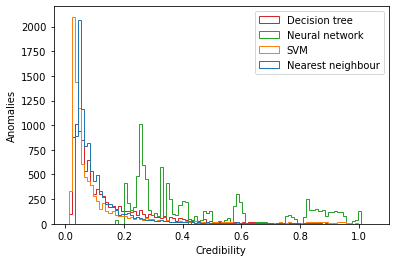

In [91]:
anom_hist_mnist = anom_detect_hist(model_pvalues_mnist_anom, model_names_mnist, hist=100)